### Solving Poisson Equation on S^2: $\Delta u = f$


In [1]:
import my_backends 
from my_backends.ducc0_wrapper import *
import my_shcoeffs
from my_shcoeffs import SHCoeffs
## my_shcoeffs contains expand_adjoint_analysis

[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmbar.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmbar_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plbar.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plbar_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmon.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmon_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plon.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plon_d1.doc'
[Errno 2] No such file or directory: '/Users/aparnagupte/Documents/cornell-reu-2021/PDPINN/doc/plmschmidt.doc'
[Errno 2] No such file or dir

In [2]:
import torch

N = 20
from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np

import pyshtools
from pyshtools.shio import shread
from pyshtools.expand import MakeGridDH
from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

torch.manual_seed(0)
maxiter = 100
problem = Problem_Sphere_Poisson()

In [3]:
N = 20
azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)

azimuth, polar = torch.meshgrid(azimuth, polar)
location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
location.shape

torch.Size([800, 2])

iteration 0: loss = 3427.2166295635466, pde loss = 3427.2166295635466


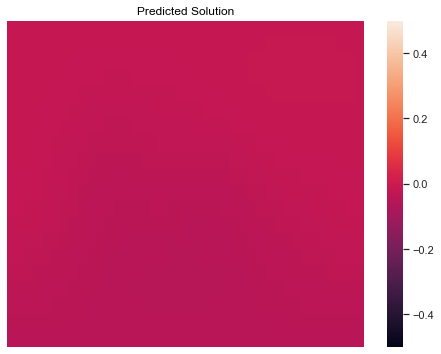

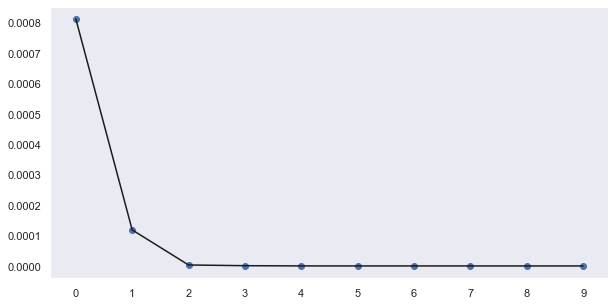

iteration 1: loss = 3426.9202052226638, pde loss = 3426.9202052226638
iteration 2: loss = 3426.6407388888383, pde loss = 3426.6407388888383
iteration 3: loss = 3426.3727071484263, pde loss = 3426.3727071484263
iteration 4: loss = 3426.0944257826322, pde loss = 3426.0944257826322
iteration 5: loss = 3425.8085169175242, pde loss = 3425.8085169175242
iteration 6: loss = 3425.504205916094, pde loss = 3425.504205916094
iteration 7: loss = 3425.1658264907064, pde loss = 3425.1658264907064
iteration 8: loss = 3424.8093199676305, pde loss = 3424.8093199676305
iteration 9: loss = 3424.3767837460714, pde loss = 3424.3767837460714
iteration 10: loss = 3423.910809613575, pde loss = 3423.910809613575
iteration 11: loss = 3423.43758213795, pde loss = 3423.43758213795
iteration 12: loss = 3422.883052590944, pde loss = 3422.883052590944
iteration 13: loss = 3422.3062606202625, pde loss = 3422.3062606202625
iteration 14: loss = 3421.64300570479, pde loss = 3421.64300570479
iteration 15: loss = 3420.999

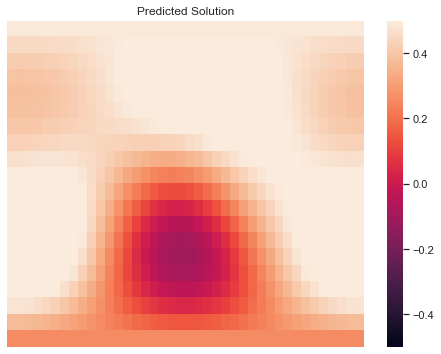

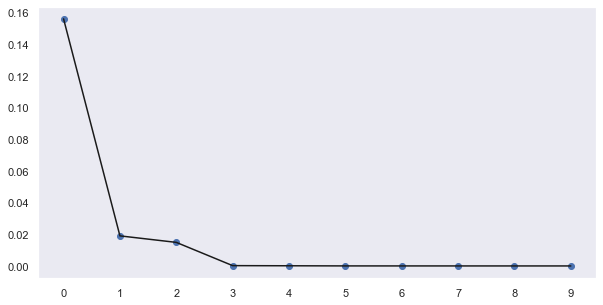

iteration 21: loss = 3416.6861146601327, pde loss = 3416.6861146601327
iteration 22: loss = 3416.1923991330623, pde loss = 3416.1923991330623
iteration 23: loss = 3415.762376712791, pde loss = 3415.762376712791
iteration 24: loss = 3415.5151968787054, pde loss = 3415.5151968787054
iteration 25: loss = 3415.3907361045713, pde loss = 3415.3907361045713
iteration 26: loss = 3415.310491553935, pde loss = 3415.310491553935
iteration 27: loss = 3415.321923178445, pde loss = 3415.321923178445
iteration 28: loss = 3415.2486449912276, pde loss = 3415.2486449912276
iteration 29: loss = 3415.0966698846423, pde loss = 3415.0966698846423
iteration 30: loss = 3414.8724531046537, pde loss = 3414.8724531046537
iteration 31: loss = 3414.4648290376504, pde loss = 3414.4648290376504
iteration 32: loss = 3413.9816717956633, pde loss = 3413.9816717956633
iteration 33: loss = 3413.567413482821, pde loss = 3413.567413482821
iteration 34: loss = 3412.9345975611386, pde loss = 3412.9345975611386
iteration 35: 

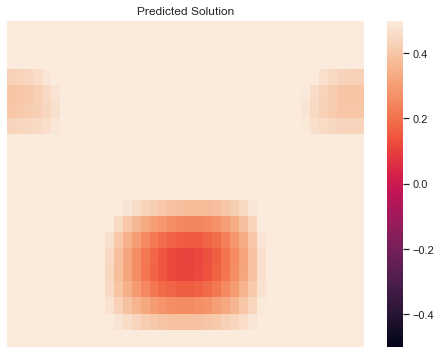

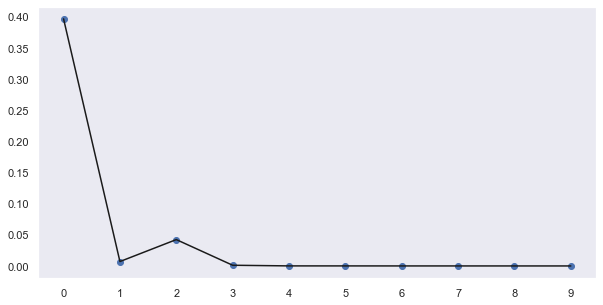

iteration 41: loss = 3410.1745292781507, pde loss = 3410.1745292781507
iteration 42: loss = 3409.530383926895, pde loss = 3409.530383926895
iteration 43: loss = 3408.803514960777, pde loss = 3408.803514960777
iteration 44: loss = 3407.9310450205035, pde loss = 3407.9310450205035
iteration 45: loss = 3406.822319569956, pde loss = 3406.822319569956
iteration 46: loss = 3405.3574187086606, pde loss = 3405.3574187086606
iteration 47: loss = 3403.5625131708025, pde loss = 3403.5625131708025
iteration 48: loss = 3401.4651369139906, pde loss = 3401.4651369139906
iteration 49: loss = 3398.754517110187, pde loss = 3398.754517110187
iteration 50: loss = 3395.505346532822, pde loss = 3395.505346532822
iteration 51: loss = 3391.2273305269005, pde loss = 3391.2273305269005
iteration 52: loss = 3386.057590814316, pde loss = 3386.057590814316
iteration 53: loss = 3379.9236287677163, pde loss = 3379.9236287677163
iteration 54: loss = 3372.460818096842, pde loss = 3372.460818096842
iteration 55: loss =

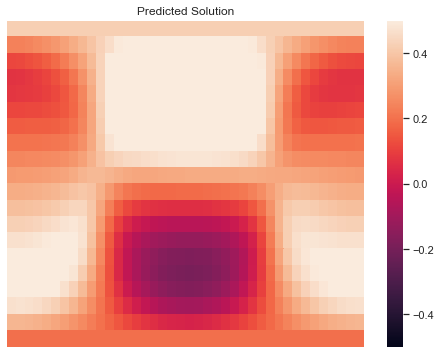

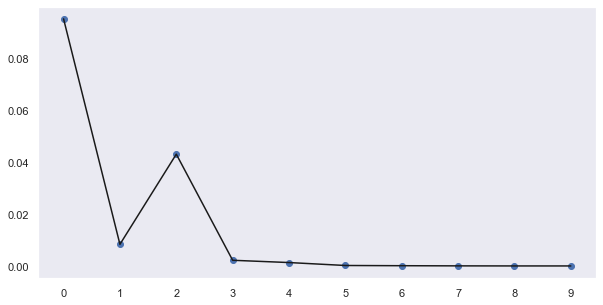

iteration 61: loss = 3254.2602966201684, pde loss = 3254.2602966201684
iteration 62: loss = 3220.5422083425074, pde loss = 3220.5422083425074
iteration 63: loss = 3179.3535050426626, pde loss = 3179.3535050426626
iteration 64: loss = 3130.369073847729, pde loss = 3130.369073847729
iteration 65: loss = 3074.1275900471824, pde loss = 3074.1275900471824
iteration 66: loss = 3011.8624924943815, pde loss = 3011.8624924943815
iteration 67: loss = 2943.518098934537, pde loss = 2943.518098934537
iteration 68: loss = 2868.252639943641, pde loss = 2868.252639943641
iteration 69: loss = 2787.2391596240404, pde loss = 2787.2391596240404
iteration 70: loss = 2702.9812037836928, pde loss = 2702.9812037836928
iteration 71: loss = 2617.3341508058115, pde loss = 2617.3341508058115
iteration 72: loss = 2529.405786310109, pde loss = 2529.405786310109
iteration 73: loss = 2439.916632570766, pde loss = 2439.916632570766
iteration 74: loss = 2352.302634027973, pde loss = 2352.302634027973
iteration 75: loss

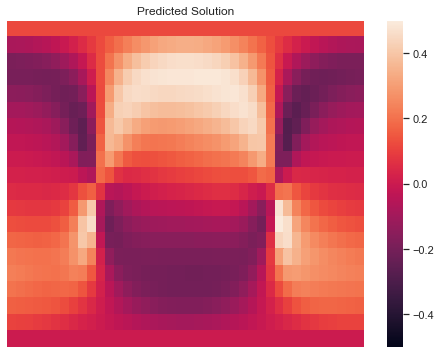

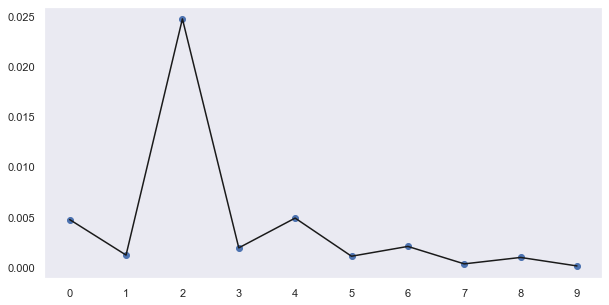

iteration 81: loss = 1780.6485712745186, pde loss = 1780.6485712745186
iteration 82: loss = 1705.964679141888, pde loss = 1705.964679141888
iteration 83: loss = 1635.193211802834, pde loss = 1635.193211802834
iteration 84: loss = 1566.2413293524019, pde loss = 1566.2413293524019
iteration 85: loss = 1499.012544621919, pde loss = 1499.012544621919
iteration 86: loss = 1441.7192688068371, pde loss = 1441.7192688068371
iteration 87: loss = 1395.818496455869, pde loss = 1395.818496455869
iteration 88: loss = 1352.7364091582865, pde loss = 1352.7364091582865
iteration 89: loss = 1359.0838806120128, pde loss = 1359.0838806120128
iteration 90: loss = 1306.5793238607416, pde loss = 1306.5793238607416
iteration 91: loss = 1262.9080004927823, pde loss = 1262.9080004927823
iteration 92: loss = 1281.8780443978726, pde loss = 1281.8780443978726
iteration 93: loss = 1211.7029199296426, pde loss = 1211.7029199296426
iteration 94: loss = 1213.8426313268972, pde loss = 1213.8426313268972
iteration 95: 

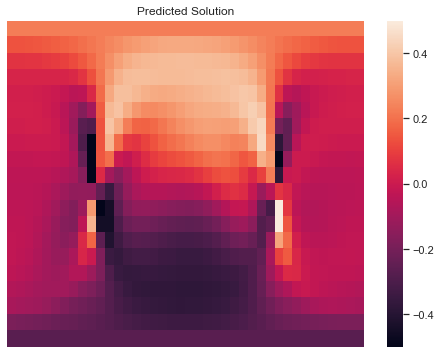

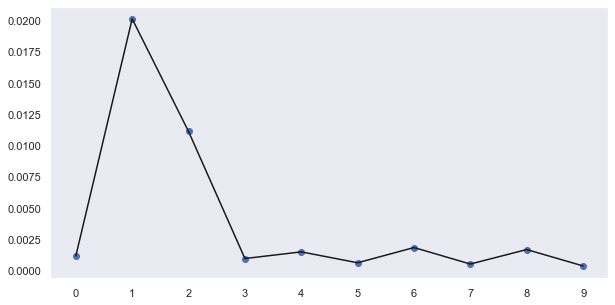

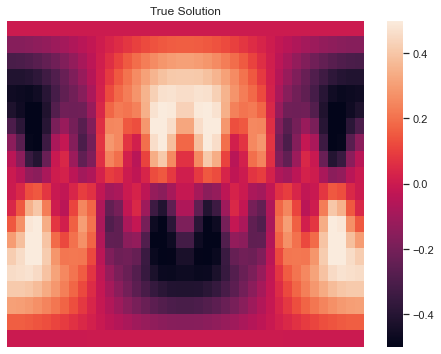

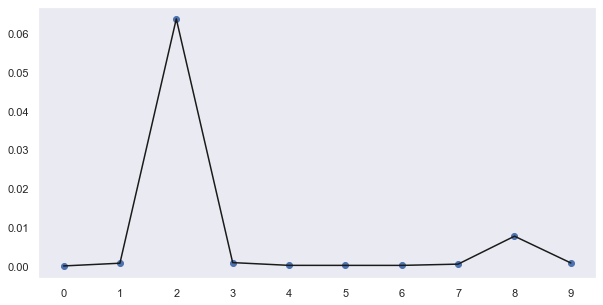

In [4]:

def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
#             self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])
            self.loss_history.append([self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, N=N):
            azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
            polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
            
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            return location # numpy ndarray with shape (N, 2*N)

        def bc_sample(self):
            return torch.tensor([[1., 1.]]) # arbitrary point is okay?

        def init_sample(self):
            pass

        def plot(self, net):
#             azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
#             polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
#             azimuth, polar = torch.meshgrid(azimuth, polar)
#             location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            location = self.inner_sample()
            value = net(location) # predicted solution
            
            value = value.reshape((N, 2*N))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
            
            self.spherical_harmonic_transform(net)
        
        def spherical_harmonic_transform(self, net):
            azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            function_grid = net(location)
            function_grid = function_grid.reshape((N, 2*N))
            
            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2)
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]

            power_per_l = spectrum(coefficients)[:10]
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            ax.grid()
            plt.show()
            
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, N, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 2*N, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((N, 2*N))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
            self.sht_value(value)
            
        def sht_value(self, function_grid):
            function_grid = function_grid.reshape((N, 2*N))
            
            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2)
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]

            power_per_l = spectrum(coefficients)[:10]
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            ax.grid()
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                for losses in self.loss_history:
                    for i in range(3):
                        losses[i].detach().numpy()
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                for losses in self.loss_history:
                    for i in range(3):
                        losses[i].detach().numpy()
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample()
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
#                 coor_inner = self.inner_sample().requires_grad_(True)
                infer_value_inner = net(coor_inner)
#                 truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                predict_inner, truth_inner = problem.pde(coor_inner, infer_value_inner) 
                ## order, is the lhs even the predicted value???
                ## reason the loss function is going up could be because we are computing the negative gradient, which could happen by switching the order of y, y_pred in orward and backward functions of the loss.
        
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)
            
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss
                self.add_loss_history()
#                 self.total_loss.register_hook(lambda grad: print('gradient', grad))
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
#                 scheduler.step()
                
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}, pde loss = {}".format(iter, self.total_loss, self.pde_loss))
                        
                if iter % int(maxiter / 5) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
#             self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 100, 50, 50, 16, 1]))
model.train()
